In [1]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
from scipy.signal import find_peaks as fp
from mpmath import ellipk,log
from scipy.special import gamma as GAMMA
import os 
#from mpl_toolkits import mplot3d
from scipy.optimize import fmin_cg, fmin_tnc, curve_fit, newton, bisect, fsolve
from SourcesTBG import *
from MoreSources import *
from scipy.misc import derivative as scider
import pandas as pd
from scipy.linalg import eigh,eig,eigvalsh
from functools import partial
import seaborn as sns
from FeynmanHellman import *
from saddlefinder import *
import csv
from Decorators import *
from YuanDos import *
from DosHelper import*
TO_DEGREE = 1.0/0.018326
IN_RADIAN = np.pi/180
vFpar = 4.31074647887324
wpar=0.11
BANDS = 8

In [2]:
thetaset = np.load('thetaset.npy')
saddleset = np.load('saddleset.npy')
rotangs = np.load('rotangs.npy')
alphabeta = np.load('alphabeta.npy') #Note the need to multiply 0.5 to the values in the loaded alphabeta
Evs = np.load('Evs.npy')
gamma, kappa = np.load('gammakappa.npy') #No need to multiply any combinatorial factors here
BWset = np.load('BWset.npy')

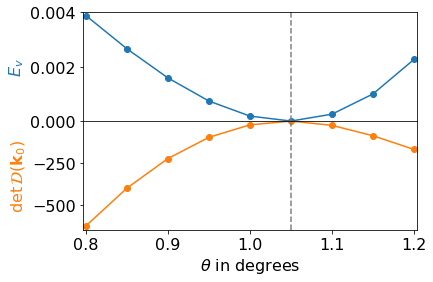

In [13]:
alpha,beta = 0.5*alphabeta.T
detH = alpha*beta
plt.rcParams.update({'font.size': 16})
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
fig.subplots_adjust(hspace=0)
# fig=plt.figure()
# ax1 = plt.subplot(211)
# ax2 = plt.subplot(212)
ax1.plot(thetaset,Evs,'o-')
ax2.plot(thetaset,detH,'o-',color='C1')
ax1.set_ylim(0,0.004)
ax2.set_ylim(-650,-0.01)
ax1.set_ylabel(r'$E_v$',color = 'C0')
ax2.set_ylabel(r'$ \operatorname{det} \,\mathcal{D}(\mathbf{k}_0)$',color = 'C1')
ax1.axvline(1.05,ls='--',c='gray')
ax2.axvline(1.05,ls='--',c='gray')
ax2.set_xlabel(r'$\theta$ in degrees')
ax1.set_xlim([0.796,1.204])
ax2.set_xlim([0.796,1.204])
#plt.savefig('RevisedFigs/ShowHigherOrder.pdf',bbox_inches='tight')
#ax1.set_xticklabels([])

In [4]:
alphabeta.T

array([[ 1.75956659e+02,  1.56467126e+02,  1.38331309e+02,
         1.21933121e+02,  1.07886466e+02,  9.71561756e+01,
         8.98725381e+01,  8.64832653e+01,  8.61631575e+01],
       [-1.42599170e+01, -1.02631927e+01, -6.48074723e+00,
        -3.18641765e+00, -8.32377779e-01, -3.29489450e-03,
        -1.13657313e+00, -4.06450489e+00, -7.86968263e+00]])

In [5]:
X = np.linspace(-0.05,0.05,1000)
Y = np.linspace(-0.05,0.05,1000)
X,Y,Z = data_for_contours(1.05,X=X,Y=Y)
df = pd.DataFrame(Z.flatten())

(0.0, 600.0)

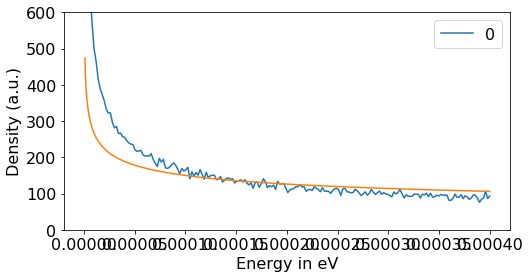

In [6]:
#Nonsense.pdf
cutoff = 0.0004
sns.kdeplot(data = df, clip = (0.0000,cutoff), bw_adjust=0.0004,color = 'C2')
ax = plt.gca()

ax.set_xlabel('Energy in eV')
ax.set_ylabel('Density (a.u.)')
fig = plt.gcf()
fig.set_figwidth(8)
#plt.savefig('FigsPaper/PowerlawFit.pdf')

xvals = np.linspace(0+0.000001,cutoff,1000)
const = 15
#const = 30
fit = const * xvals**(-0.25)
ax.plot(xvals,fit,color='C1')
ax.set_ylim(0,600)

#ax.set_xscale('log')
#ax.set_yscale('log')

#constlog1 = 20
#constlog2 = 0.05
#logfit = constlog1 * np.log(constlog2/(xvals))
#ax.plot(xvals,logfit,color='C3')